In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

C:\Users\Pratham Gupta\AppData\Local\Temp\ipykernel_12964\2636100024.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("heart_disease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()               # Checking for missing values in df

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Statisctical measures of data

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Splitting features and target


In [6]:
x_features = df.drop(columns='target', axis = 1)

y_target = df['target']

In [7]:
x_features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
y_target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Splitting data into training and testing sets

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.2, stratify = y_target, random_state=2)

# stratify is used to make sure target vals (0 and 1) are equally distributed

In [10]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2


In [11]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2


In [12]:
y_train

61     1
238    0
160    1
158    1
289    0
      ..
100    1
49     1
300    0
194    0
131    1
Name: target, Length: 242, dtype: int64

In [13]:
y_test

255    0
72     1
83     1
268    0
92     1
      ..
42     1
187    0
8      1
122    1
19     1
Name: target, Length: 61, dtype: int64

In [14]:
print(x_features.shape, x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


### Model Training

In [15]:
# Creating an instance of DecisionTreeClassifier

clf = tree.DecisionTreeClassifier()

In [16]:
# model training

clf.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.49027777777777776, 0.9444444444444444, 'x[2] <= 0.5\ngini = 0.496\nsamples = 242\nvalue = [110, 132]'),
 Text(0.2777777777777778, 0.8333333333333334, 'x[11] <= 0.5\ngini = 0.373\nsamples = 113\nvalue = [85, 28]'),
 Text(0.2, 0.7222222222222222, 'x[12] <= 2.5\ngini = 0.498\nsamples = 51\nvalue = [24, 27]'),
 Text(0.1111111111111111, 0.6111111111111112, 'x[8] <= 0.5\ngini = 0.358\nsamples = 30\nvalue = [7, 23]'),
 Text(0.044444444444444446, 0.5, 'x[4] <= 316.5\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.022222222222222223, 0.3888888888888889, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.06666666666666667, 0.3888888888888889, 'x[3] <= 135.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.044444444444444446, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08888888888888889, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.17777777777777778, 0.5, 'x[10] <= 1.5\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0

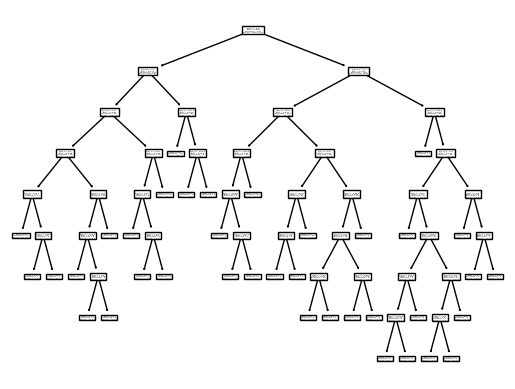

In [17]:
tree.plot_tree(clf)

### Model Evaluation

In [18]:
# Accuracy on training data

train_pred = clf.predict(x_train)
train_accuracy = accuracy_score(train_pred, y_train)*100

In [19]:
print("Accuracy score for train data: ", train_accuracy)

Accuracy score for train data:  100.0


In [20]:
# Accuracy on testing data

test_pred = clf.predict(x_test)
test_accuracy = accuracy_score(test_pred, y_test)*100

In [21]:
print("Accuracy score for test data: ", test_accuracy)

Accuracy score for test data:  81.9672131147541


### Predicting the target

In [48]:
input_data = np.array((57, 0, 0, 140, 241, 0, 1, 123, 1, 0.2, 1, 0, 3))

In [49]:
# changing input data to numpy array in order to reshape the data

input_data_as_numpy_array = np.array(input_data)
input_data_as_numpy_array

array([5.70e+01, 0.00e+00, 0.00e+00, 1.40e+02, 2.41e+02, 0.00e+00,
       1.00e+00, 1.23e+02, 1.00e+00, 2.00e-01, 1.00e+00, 0.00e+00,
       3.00e+00])

In [50]:
# Reshaping because we are predicting for one instance/data point

reshaped_data = input_data_as_numpy_array.reshape(1,-1)
reshaped_data

# We rehaped the data because, the predict function expects a 2d array, in our case, we have a 1D array and that's why we have to reshape to get a 2d array with one row

array([[5.70e+01, 0.00e+00, 0.00e+00, 1.40e+02, 2.41e+02, 0.00e+00,
        1.00e+00, 1.23e+02, 1.00e+00, 2.00e-01, 1.00e+00, 0.00e+00,
        3.00e+00]])

In [51]:
prediction = clf.predict(reshaped_data)
if(prediction == 1):
    print("Heart Defect")
else:
    print("Healthy Heart")

Heart Defect


d:\Projects\Ongoing\Heart Disease Prediction Flask App (ML)\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
